In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab\ Notebooks/Machine\ Learning/Lab\ 8\ -\ Random\ Forest\ +\ Clustering

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Lab 8 - Random Forest + Clustering


In [ ]:
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
def neighborsGen(X, point, eps, metric):
    """
    Generates neighborhood graph for a given point
    """
    
    neighbors = []
    
    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps:
            neighbors.append(i)
    
    return neighbors

In [ ]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
    """
    Expands cluster from a given point until neighborhood boundaries are reached
    """
    clusters[point] = currentPoint
    
    i = 0
    while i < len(neighbors):
        
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
        
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors
        
        i += 1

In [ ]:
def simple_DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):
    
    currentPoint = 0
    
    for i in range(0, X.shape[0]):
        if clusters[i] is not 0:
            continue
    
        neighbors = neighborsGen(X, i, eps, metric)

        if len(neighbors) < minPts:
            clusters[i] = -1

        else:
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
    
    return clusters

In [ ]:
class Basic_DBSCAN:

    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
    
    def fit_predict(self, X):
        clusters = [0] * X.shape[0]
        simple_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)
        return clusters

In [ ]:
df = pd.read_csv('Cust_Segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
#Pre-Processing dataset
X = df[['Card Debt','Other Debt']]
X = StandardScaler().fit_transform(X)
X

array([[-0.68381116, -0.59048916],
       [ 1.41447366,  1.51296181],
       [ 2.13414111,  0.80170393],
       ...,
       [ 0.5766659 ,  0.03863257],
       [-0.68757659, -0.70147601],
       [ 0.13611081,  0.16463355]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


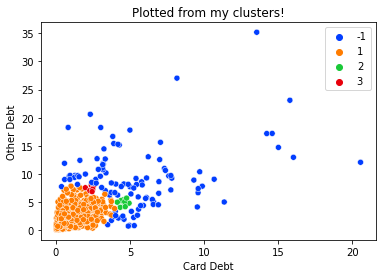

In [ ]:
scanner = Basic_DBSCAN(eps=0.3,minPts=10)
clusters = scanner.fit_predict(X)
sns.scatterplot(df.iloc[:, 5], df.iloc[:, 6], hue=clusters, palette='bright')
plt.title('Plotted from my clusters!')
plt.show();